# Computer Simulations of Stochastic Processes - Report 2
## Report by Wojciech Becela & Kacper Kinastowski

## TODO:

1.  Write a multivariate stable distribution generator for any given discrete spectral mea-sure and parameter α. Consider only 2 dimensional case. Present your simulated sample on scatterplot. Simulate the following cases: (a) symmetric stable vector (b) stable vector with independent components (c) stable vector which is not symmetric and has not independent components. Consider any α < 2

2. Write a generator for sub-Gaussian random vector.

3. Write a function/script that estimates α and spectral measure Γ for a given sample.

4. Write a function/script that estimates the characteristic function for multivariate data (2-dimensional).

5. Write a function/script estimating codifference measure for a given 2-dimensional sample. Present its result for a few chosen 2-dimensional stable distributions (considerdifferent α’s and/or different spectral measures Γ)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import levy_stable
import seaborn as sns

## Exercise 1 

In [2]:
def stable_dist(alpha,beta,size,symmetric = False):
    theta = np.random.uniform(-np.pi/2 , np.pi / 2,size)
    tht0 = (np.arctan(beta*np.tan(np.pi * alpha/2)))/alpha
    W = np.random.exponential(1,size)
    if symmetric:
        if alpha != 1:
            Z = (np.sin(alpha * theta)/(np.cos(theta))**(1/alpha)) * (np.cos((alpha - 1) * theta) / W) ** ((1 - alpha)/alpha)
        else:
            Z = np.tan(theta)
    else:
        if alpha != 1:
            Z = (np.sin(alpha*(tht0 + theta))/((np.cos(alpha*tht0)*np.cos(theta)))**(1/alpha)) * (np.cos(alpha*tht0 + (alpha - 1)*theta)/W)**((1-alpha)/alpha)
        else:
            Z = 2*(np.pi/2 + beta*theta)*np.tan(theta) - beta*np.log(0.5*np.pi*W*np.cos(theta)/(np.pi/2 + beta*theta))/np.pi
        
    return Z


def multivar_stable_dist(alpha,gamma,N,s,symmetric):
    X = np.zeros(N)
    Y = np.zeros(N)
    
    for i in range(N):
        Z = stable_dist(alpha, 1, len(s[0]),symmetric)
        
        if alpha == 1:
            X[i] = np.sum(gamma ** (1/alpha) * (Z + 2*np.log(gamma)/np.pi) * s[0])
            Y[i] = np.sum(gamma ** (1/alpha) * (Z + 2*np.log(gamma)/np.pi) * s[1]) 
        else:
            X[i] = np.sum(gamma ** (1/alpha) * Z * s[0])
            Y[i] = np.sum(gamma ** (1/alpha) * Z * s[1])
            
    return X,Y 

### Different parameters & simulation plots:

In [3]:
#symetric stable vector
gamma0 = np.array([0.25, 0.125, 0.25, 0.25, 0.125, 0.25])
s_x0 = [1,1/2,-1/2,-1,-1/2,1/2]
s_y0 = [0,math.sqrt(3)/2,-math.sqrt(3)/2,0,-math.sqrt(3)/2,math.sqrt(3)/2]
s0 = [s_x0,s_y0]
alpha0 = 1.5
N0 = 10**4
msd0 = multivar_stable_dist(alpha0, gamma0, N0, s0 ,symmetric = True)

#independent components
gamma = np.zeros(4) + 0.25 
s_x = [-1,0,0,1]
s_y = [0,-1,1,0]
s = [s_x,s_y]
msd2 = multivar_stable_dist(alpha0, gamma, N0, s,symmetric = True)

#non - symmetric stable vector
gamma1 = np.array([0.1, 0.3, 0.1, 0.3, 0.1])
s_x1 = [1,math.sqrt(3)/2,1/2,0,-1/2]
s_y1 = [0,1/2,math.sqrt(3)/2,1,math.sqrt(3)/2]
s1= [s_x1,s_y1]
msd3 = multivar_stable_dist(alpha0, gamma1, N0, s1,False)

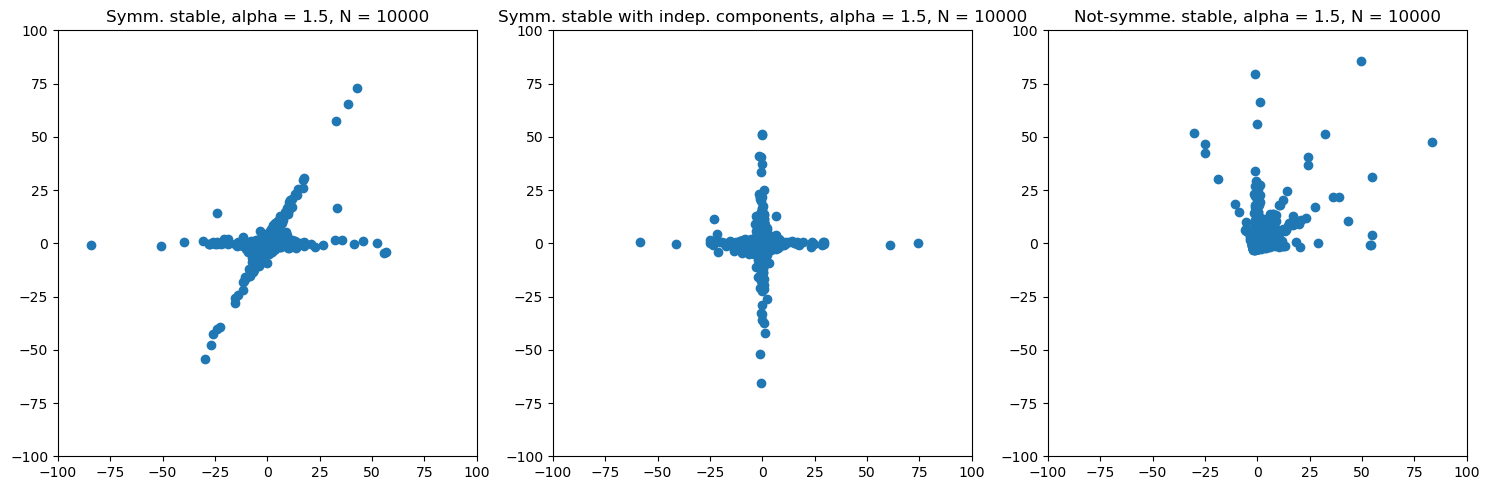

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(msd0[0], msd0[1])
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)
ax1.set_title(f'Symm. stable, alpha = {alpha0}, N = {N0}')

ax2.scatter(msd2[0], msd2[1])
ax2.set_xlim(-100, 100)
ax2.set_ylim(-100, 100)
ax2.set_title(f'Symm. stable with indep. components, alpha = {alpha0}, N = {N0}')

ax3.scatter(msd3[0], msd3[1])
ax3.set_xlim(-100, 100)
ax3.set_ylim(-100, 100)
ax3.set_title(f'Not-symme. stable, alpha = {alpha0}, N = {N0}')

plt.tight_layout()
plt.show()

## Exercise 2 (sub - gaussian random vector)

In [5]:
def sub_gaussian(alfa,n):
    X = np.zeros(n)
    Y = np.zeros(n)
    
    for i in range(n):
        A = levy_stable.rvs(alpha = alfa/2,beta = 1, scale = np.cos(np.pi * alfa / 4)**(2/alfa),loc = 0)
        G = np.sqrt(A) * np.random.normal(0,1,2)
        X[i],Y[i] = G[0],G[1]
        
    return X,Y

In [45]:
N = 2*10 ** 4
X_g,Y_g = sub_gaussian(alpha0,N)

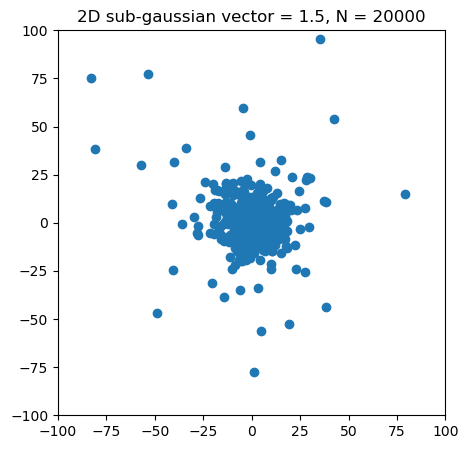

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.scatter(X_g,Y_g)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_title(f'2D sub-gaussian vector = {alpha0}, N = {N}')
plt.show()

## Exercise 3

In [131]:
#symetric stable vector
gamma = np.array([0.25, 0.125, 0.25, 0.25, 0.125, 0.25])
s_x = [1,1/2,-1/2,-1,-1/2,1/2]
s_y = [0,math.sqrt(3)/2,-math.sqrt(3)/2,0,-math.sqrt(3)/2,math.sqrt(3)/2]
s = [s_x,s_y]
alpha = 1.5
N = 10**5
msd1 = multivar_stable_dist(alpha, gamma, N, s ,symmetric = True)

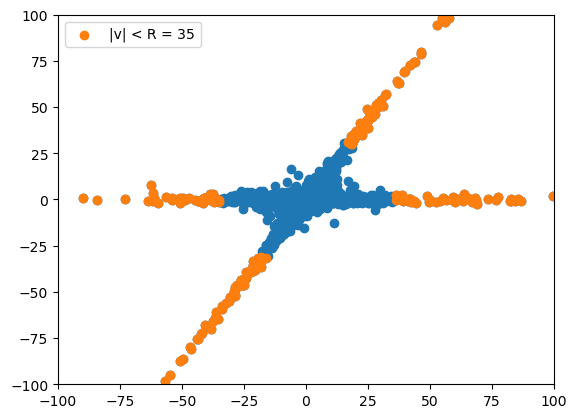

In [146]:
new_arr = []
R = 35

for i in range(N):
    v_i = (msd1[0][i], msd1[1][i])
    if (v_i[0] ** 2 + v_i[1] ** 2 > R ** 2):
        new_arr.append(v_i)
        
X = [point[0] for point in new_arr]
Y = [point[1] for point in new_arr]

plt.scatter(msd1[0], msd1[1])
plt.scatter(X,Y, label = f'|v| < R = {R}')
plt.legend()
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

In [147]:
def point_in_angle(point, alpha, beta):
    x, y = point
    
    # Calculate the angle of the point
    point_angle = math.atan2(y, x)
    
    # Normalize the angles between 0 and 2*pi
    if point_angle < 0:
        point_angle += 2 * math.pi
        
    alpha = math.radians(alpha)
    beta = math.radians(beta)
    
    # Normalize the angles between 0 and 2*pi
    if alpha < 0:
        alpha += 2 * math.pi
    if beta < 0:
        beta += 2 * math.pi
        
    # Check if the point angle is between alpha and beta
    if alpha < beta:
        return alpha <= point_angle <= beta
    else:
        return alpha <= point_angle or point_angle <= beta

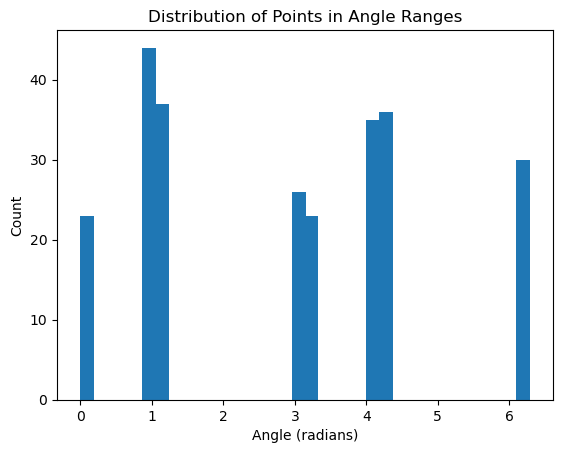

In [157]:
def generate_histogram(points):
    angle_ranges = []
    for i in range(0, 36):
        angle_ranges.append((10*i, 10*(i + 1)))
    counts = [0] * len(angle_ranges)

    for point in points:
        for i, (alpha, beta) in enumerate(angle_ranges):
            if point_in_angle(point, alpha, beta):
                counts[i] += 1

    angles_degrees = [sum(angle_range) / 2 for angle_range in angle_ranges]
    angles_radians = [math.radians(angle) for angle in angles_degrees]

    plt.bar(angles_radians, counts, width=0.2)  # Width set to approximately 1 degree in radians
    plt.xlabel("Angle (radians)")
    plt.ylabel("Count")
    plt.title("Distribution of Points in Angle Ranges")
    plt.show()
    
    return counts

counts = generate_histogram(new_arr)

Text(0.5, 1.0, 'Histogram')

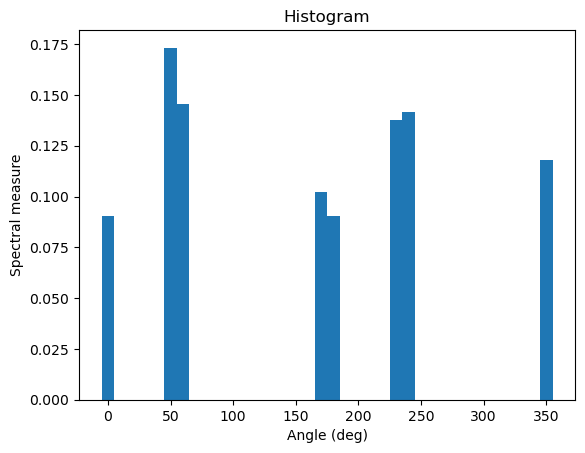

In [161]:
sum_counts = np.sum(counts)
spectral_measure = []
for i, peak in enumerate(counts):
    spectral_temp = peak/sum_counts
    tup =  (i*10, spectral_temp)
    spectral_measure.append(tup)
    
x = [point[0] for point in spectral_measure]
y = [point[1] for point in spectral_measure]

plt.bar(x, y, width=10)
plt.xlabel("Angle (deg)")
plt.ylabel("Spectral measure")
plt.title("Histogram")

## Exercise 4 (estimating 2 dimensional characteristic function for a given sample)

In [11]:
def multivar_random_vector(mean,cov_matrix,n,dim = 2):
    
    A = np.linalg.cholesky(cov_matrix)
    
    Z = np.random.normal(size = (dim,n))
    
    X = np.dot(A,Z).reshape((n,dim)) + mean
    
    return X

def emp_multivar_CF(data,t):
    
    i = 0 + 1j
    phi = float(np.mean(np.exp(i * np.dot(t, data.T))))
    
    return phi



C:\Users\kacpe\AppData\Local\Temp\ipykernel_15088\1264335827.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  phi = float(np.mean(np.exp(i * np.dot(t, data.T))))


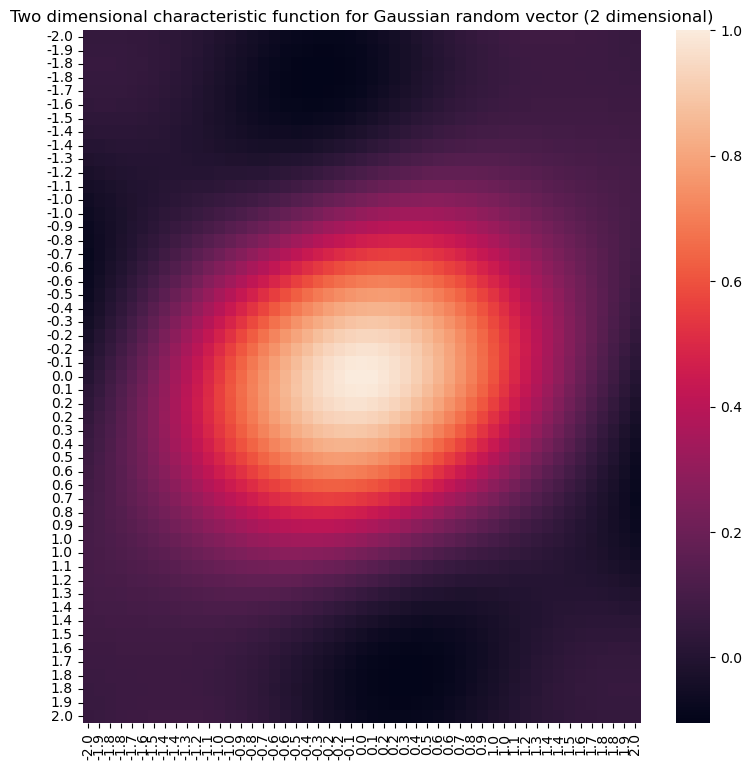

In [12]:
cov_matrix = np.array([[1.,0.8],[0.8,1.]])
means = np.array([0.,1.])
X = multivar_random_vector(means,cov_matrix,100)

n = 51
t1 = np.linspace(-2, 2, n)
t2 = np.linspace(-2, 2, n)
T1,T2 = np.meshgrid(t1, t2)
phis = np.zeros((n,n))

for i in range(len(T1)):
    for j in range(len(T2)):
        t = np.array([T1[i][j],T2[i][j]])
        phis[i][j] = emp_multivar_CF(X,t)


plt.figure(figsize = (9,9))
plt.title("Two dimensional characteristic function for Gaussian random vector (2 dimensional)")
sns.heatmap(phis,xticklabels = t1.round(1),yticklabels = t2.round(1))
plt.show()

## Exercise 5

In [30]:
def emp_CF(X,t):
    i = 0 + 1j
    phi = np.zeros(len(t))
    for j in range(len(t)):
        phi[j] = np.mean(np.exp(i*t[j]*X).real)
    return phi


def codiff(X,Y):
    #computates codifference between two random datasets
    #https://arxiv.org/pdf/1407.4239.pdf
    t = np.zeros(1) + 1
    tau = np.log(emp_CF(X-Y,t)) - np.log(emp_CF(X,t)) - np.log(emp_CF(Y,t))
    return tau[0]

### Codifference of symmetric stable vector:

In [28]:
X = msd0[0]
Y = msd0[1]

codiff(X,Y)

0.7021598477801845

### Codifference of not-symmetric stable vector:

In [29]:
X2 = msd2[0]
Y2 = msd2[1]

codiff(X2,Y2)

0.007154816127460273